Dataset Shape: (1000, 13)

Data after preprocessing:
   Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0       1        1           0          0              0            21006   
1       0        1           0          1              0             9667   
2       0        0           3          0              0             6690   
3       1        0           0          0              0             6075   
4       1        0           0          0              1             9227   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0               3787         584               360               0   
1               2096         644               300               1   
2               2208         278               360               1   
3               5988         393               360               1   
4                175         129               360               1   

   Property_Area  Loan_Status  
0              2            0  

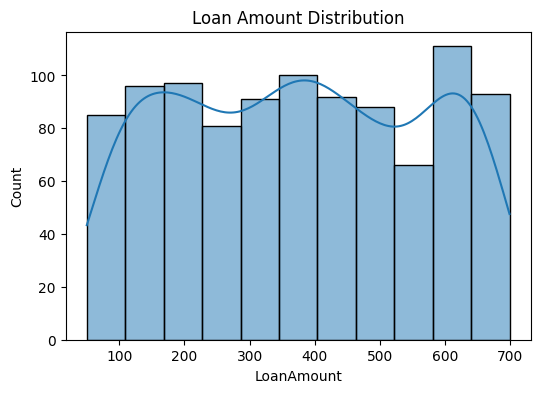

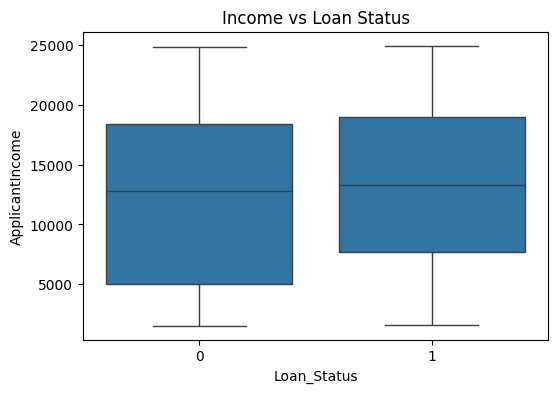

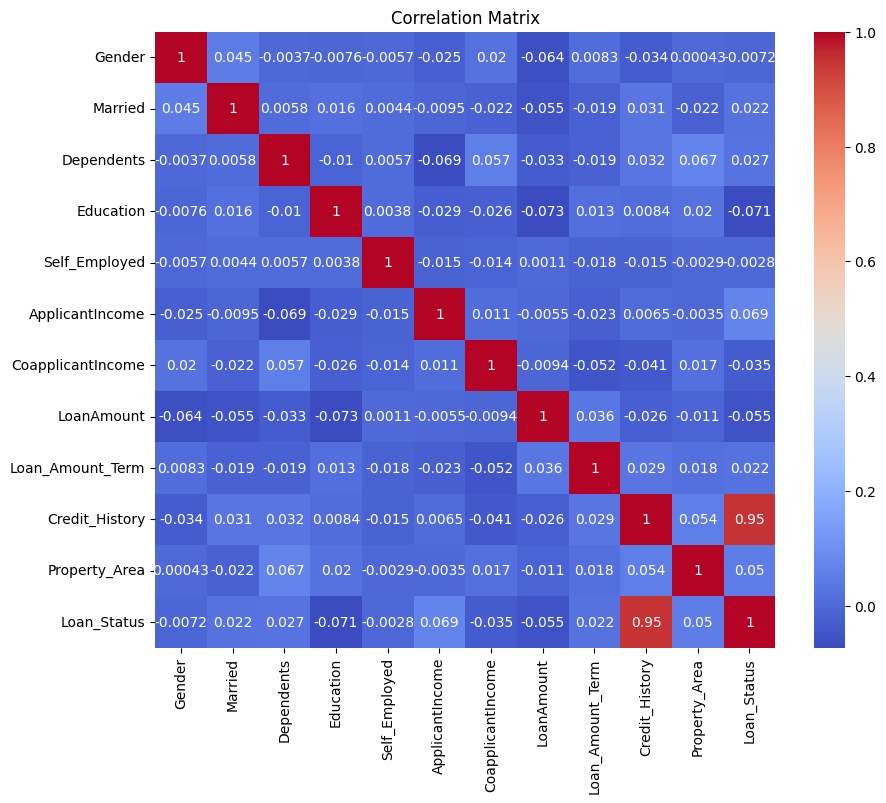


 Logistic Regression
Accuracy: 0.99
[[ 37   2]
 [  0 161]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        39
           1       0.99      1.00      0.99       161

    accuracy                           0.99       200
   macro avg       0.99      0.97      0.98       200
weighted avg       0.99      0.99      0.99       200


 Decision Tree
Accuracy: 1.0
[[ 39   0]
 [  0 161]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      1.00      1.00       161

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200


 Random Forest
Accuracy: 1.0
[[ 39   0]
 [  0 161]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      1.00      1.00       161

    accuracy    

In [1]:
#  Loan Default Prediction System


#  Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings("ignore")


#  Load Dataset

df = pd.read_csv("loan_default_dataset.csv")
print("Dataset Shape:", df.shape)
df.head()


#  Data Preprocessing

# Drop unnecessary column
df.drop("Loan_ID", axis=1, inplace=True)

# Handle missing values
# Fill categorical columns with mode
for col in df.select_dtypes(include="object"):
    df[col].fillna(df[col].mode()[0], inplace=True)

# Fill numerical columns with median
for col in df.select_dtypes(include=["int64", "float64"]):
    df[col].fillna(df[col].median(), inplace=True)

# Convert Dependents (3+ → 3)
df["Dependents"] = df["Dependents"].replace("3+", "3")
df["Dependents"] = df["Dependents"].astype(int)

# Encode categorical columns
le = LabelEncoder()
for col in df.select_dtypes(include="object"):
    df[col] = le.fit_transform(df[col])

print("\nData after preprocessing:")
print(df.head())

#  Exploratory Data Analysis

plt.figure(figsize=(6,4))
sns.histplot(df["LoanAmount"], kde=True)
plt.title("Loan Amount Distribution")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x="Loan_Status", y="ApplicantIncome", data=df)
plt.title("Income vs Loan Status")
plt.show()

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


#  Feature Scaling

X = df.drop("Loan_Status", axis=1)
y = df["Loan_Status"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Train-Test Split (80-20)


X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


# Model Training

# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


# Model Evaluation


print("\n Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

print("\n Decision Tree")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

print("\n Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


#  Model Comparison

models = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_rf)
    ]
})

print("\nModel Comparison:")
print(models)

# Select Best Model

best_model = models.sort_values(by="Accuracy", ascending=False).iloc[0]
print("\n Best Model:", best_model["Model"])
print("Best Accuracy:", best_model["Accuracy"])